# Giới thiệu lại về CNN


- Khi xử lý các bài toán ảnh, các mô hình mạng NN gặp khó khăn khi xử lý lượng input lớn.
- Mạng CNN dựa vào tính tổng hợp cục bộ, đồng thời với số lượng tham số ít hơn mạng NN, nó cũng tỏ ra hiệu quả hơn với các bài toán xử lý ảnh.

## Một số cột mốc đáng chú ý trong các bài toán xử lý ảnh

- LeNet ~1989
- AlexNet 2012
- ResNet 2015
- Transformer (ViT / VLM ~2021)

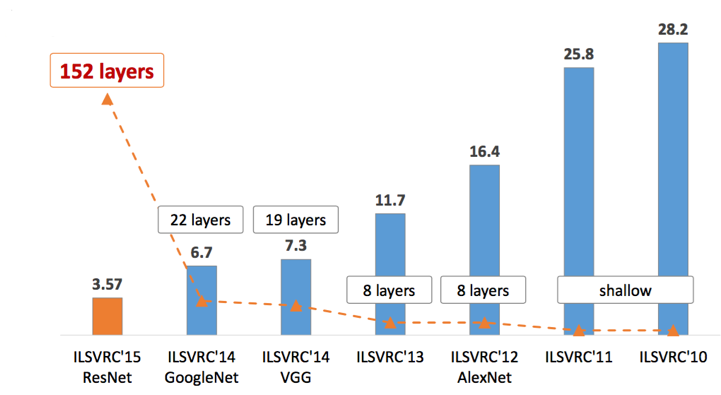

- Tính toán trong CNN

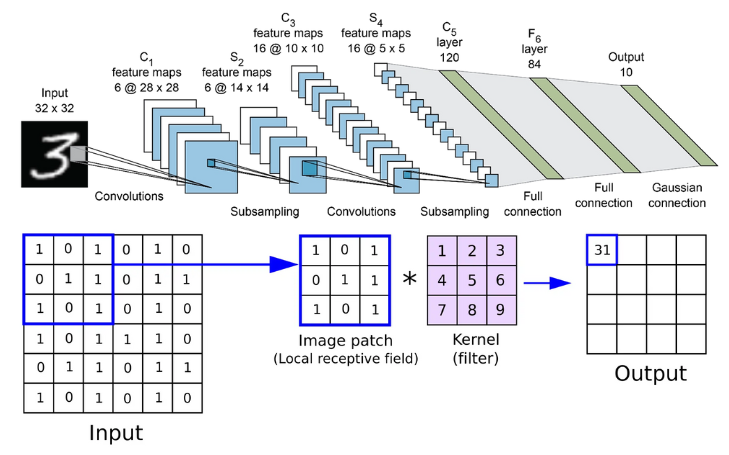

- Một kiến trúc mô hình CNN thường gặp

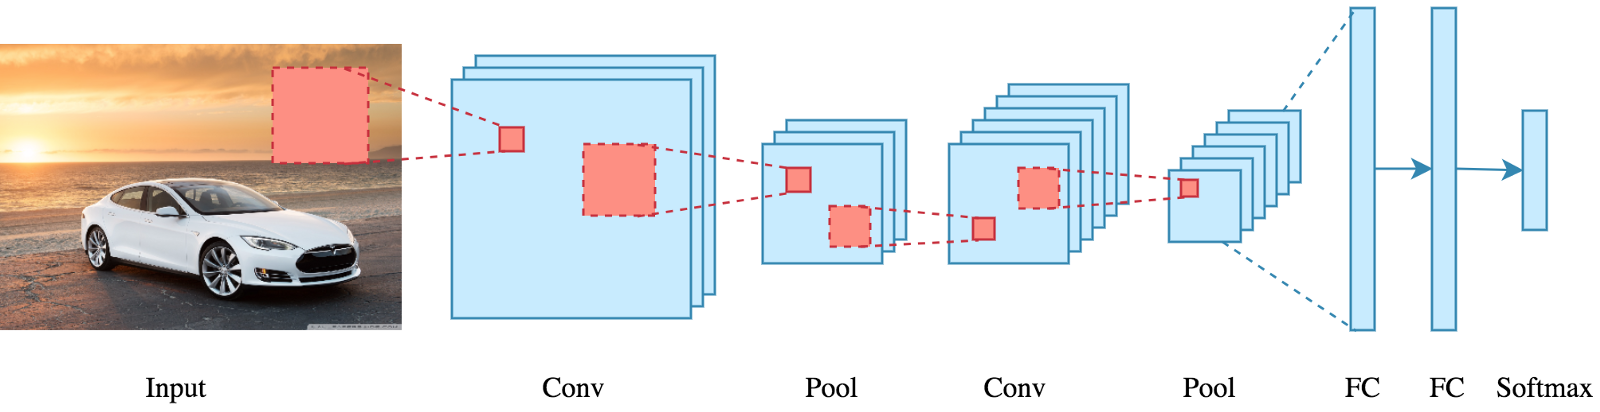

## Giới thiệu về Residual Connection

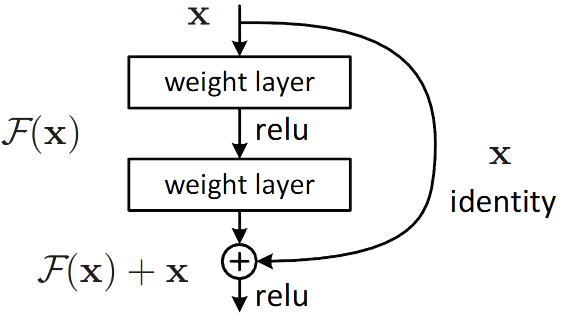

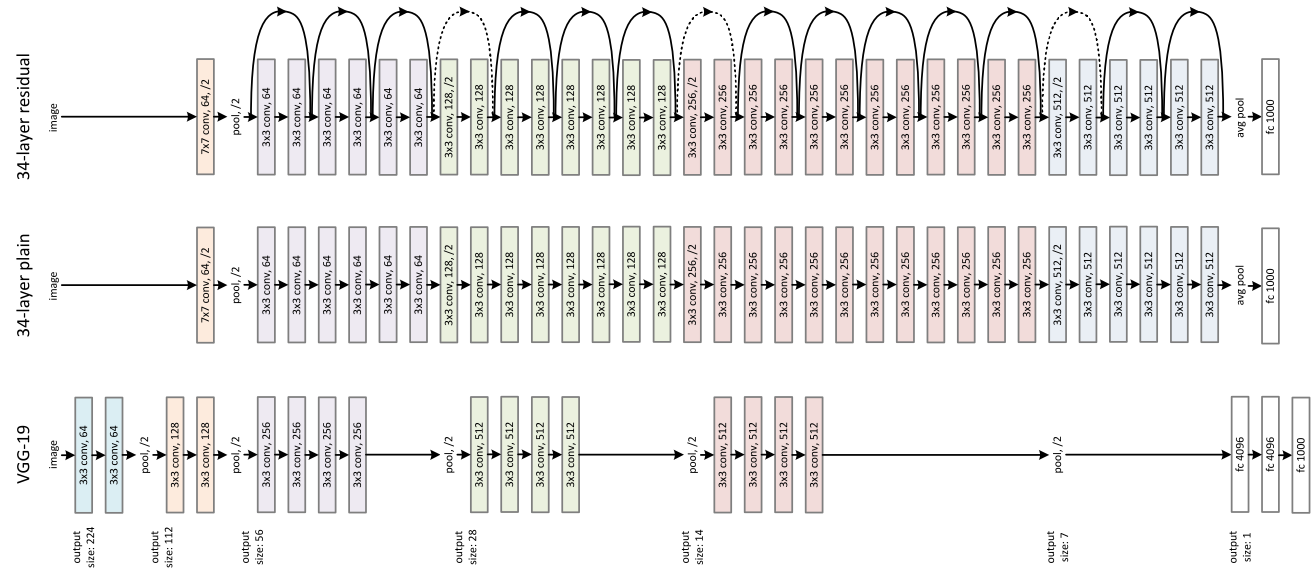

# **1. Sử dụng Tập dữ liệu MNIST**





**1. Sử dụng Tập dữ liệu MNIST**
- Xây dựng 1 mô hình CNN đơn giản để huấn luyện
    + Số layer tương đương lab_2 (classification)
    + Số epoch tương đương lab_2 (~10 epochs)
- Huấn luyện 2 mô hình và kiểm thử. So sánh kết quả 2 mô hình.
- Tính số lượng tham số của mạng CNN và so sánh với số lượng tham số của mạng NN ở lab_2.


In [ ]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
import torchvision
import torch.optim as optim
import torch.nn.functional as F
import torchvision.transforms as transforms
import torch.utils.data as data_utils

from PIL import Image
import matplotlib.pyplot as plt

import numpy as np

In [ ]:
# Use GPU if available

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'Running on {device}')

Running on cpu


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, random_split
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

# Load data
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform, download=True)



IMAGE_SHAPE = train_dataset[0][0].shape[1], train_dataset[0][0].shape[2]
classes = np.unique([t[1] for t in train_dataset])
NUM_CLASSES = len(classes)
SAMPLE_IMG_ID = 0

# Split train_dataset into train and validation
train_size = int(0.9 * len(train_dataset))
val_size = len(train_dataset) - train_size
train_dataset, val_dataset = random_split(train_dataset, [train_size, val_size])


print('Data size after splitting to train / validation / test:')
print(f'Training data: {len(train_dataset)}, Sample structure: ({type(train_dataset[SAMPLE_IMG_ID][0])} {train_dataset[SAMPLE_IMG_ID][0].shape}, {type(train_dataset[SAMPLE_IMG_ID][1])})')
print(f'Validation data: {len(val_dataset)}, Sample structure: ({type(val_dataset[SAMPLE_IMG_ID][0])} {val_dataset[SAMPLE_IMG_ID][0].shape}, {type(val_dataset[SAMPLE_IMG_ID][1])})')
print(f'Test data: {len(test_dataset)}, Sample structure: ({type(test_dataset[SAMPLE_IMG_ID][0])} {test_dataset[SAMPLE_IMG_ID][0].shape}, {type(test_dataset[SAMPLE_IMG_ID][1])})')


train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(dataset=val_dataset, batch_size=64, shuffle=False)
test_loader = DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)


Data size after splitting to train / validation / test:
Training data: 54000, Sample structure: (<class 'torch.Tensor'> torch.Size([1, 28, 28]), <class 'int'>)
Validation data: 6000, Sample structure: (<class 'torch.Tensor'> torch.Size([1, 28, 28]), <class 'int'>)
Test data: 10000, Sample structure: (<class 'torch.Tensor'> torch.Size([1, 28, 28]), <class 'int'>)


# Mô hình phân loại lab_2 cho MNIST

## Định nghĩa mô hình

In [ ]:
# Xây dựng mô hình
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 128),
            nn.ReLU(),
            nn.Linear(128, 10),
# em thay đổi 1 chút k sử dụng sigmoid và sử dụng hàm cuối cùng là linear và trả về logits sẽ tốt hơn
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

modellogistic = NeuralNetwork().to(device)
print(modellogistic)
# Khởi tạo hàm loss và optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(modellogistic.parameters(), lr=0.01)
num_epochs =10


NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=128, bias=True)
    (3): ReLU()
    (4): Linear(in_features=128, out_features=10, bias=True)
  )
)


## Train mô hình

In [ ]:
# Huấn luyện mô hình
for epoch in range(num_epochs):
    modellogistic.train()
    for batch_idx, (data, targets) in enumerate(train_loader):
        data, targets = data.to(device), targets.to(device)

        # Tính toán dự đoán và loss
        outputs = modellogistic(data)
        loss = criterion(outputs, targets)

        # Backpropagation và cập nhật trọng số
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch_idx % 100 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Step [{batch_idx+1}/{len(train_loader)}], Loss: {loss.item():.4f}')

Epoch [1/10], Step [1/844], Loss: 2.3008
Epoch [1/10], Step [101/844], Loss: 0.3938
Epoch [1/10], Step [201/844], Loss: 0.3793
Epoch [1/10], Step [301/844], Loss: 0.3165
Epoch [1/10], Step [401/844], Loss: 0.3648
Epoch [1/10], Step [501/844], Loss: 0.1027
Epoch [1/10], Step [601/844], Loss: 0.2249
Epoch [1/10], Step [701/844], Loss: 0.3204
Epoch [1/10], Step [801/844], Loss: 0.3298
Epoch [2/10], Step [1/844], Loss: 0.1582
Epoch [2/10], Step [101/844], Loss: 0.2300
Epoch [2/10], Step [201/844], Loss: 0.0606
Epoch [2/10], Step [301/844], Loss: 0.1859
Epoch [2/10], Step [401/844], Loss: 0.1993
Epoch [2/10], Step [501/844], Loss: 0.3848
Epoch [2/10], Step [601/844], Loss: 0.3878
Epoch [2/10], Step [701/844], Loss: 0.1146
Epoch [2/10], Step [801/844], Loss: 0.3158
Epoch [3/10], Step [1/844], Loss: 0.2067
Epoch [3/10], Step [101/844], Loss: 0.1265
Epoch [3/10], Step [201/844], Loss: 0.1197
Epoch [3/10], Step [301/844], Loss: 0.2449
Epoch [3/10], Step [401/844], Loss: 0.2589
Epoch [3/10], Ste

## Đánh giá mô hình

In [ ]:
def evaluate_model(model, test_loader, device):
    model.eval()  # Set the model to evaluation mode
    correct = 0
    total = 0
    with torch.no_grad():  # No need to track gradients for evaluation
        for data in test_loader:
            images, labels = data
            images, labels = images.to(device), labels.to(device)
            outputs = modellogistic(images)
            _, predicted = torch.max(outputs.data, 1)  # Get the index of the max log-probability
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f'Accuracy of the network on the train, val và test images: {accuracy:.2f}%')

# Evaluate the model after training is finished
evaluate_model(modellogistic, train_loader, device)
evaluate_model(modellogistic, val_loader, device)
evaluate_model(modellogistic, test_loader, device)
# Save model
torch.save(modellogistic.state_dict(), 'mnist_model.pth')

Accuracy of the network on the train, val và test images: 95.14%
Accuracy of the network on the train, val và test images: 94.63%
Accuracy of the network on the train, val và test images: 94.63%


# Mô hình CNN đơn giản cho MNIST

## Định nghĩa CNN

In [ ]:
# Define model
# Định nghĩa mô hình mới với 4 lớp convolution
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)  # Thêm padding để giữ kích thước
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)  # Điều chỉnh kích thước đầu vào
        self.fc2 = nn.Linear(128, 64)  # Thêm một lớp fully connected
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2)  # Thực hiện pooling sau lớp convolution đầu tiên
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2)  # Thực hiện pooling một lần nữa
        x = torch.flatten(x, 1)  # Làm phẳng tensor để chuẩn bị cho các lớp fully connected
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))  # Áp dụng activation cho lớp fully connected mới thêm vào
        x = self.fc3(x)
        return x

model = Net().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)
epochs = 10

## Train mô hình

In [ ]:
for epoch in range(epochs):
    running_loss = 0.0
    for i, (inputs, labels) in enumerate(train_loader):
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)  # Labels không cần được chuyển đổi sang float và reshape
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 100 == 99:  # Print every 100 mini-batches
            print(f'[Epoch {epoch + 1}, Batch {i + 1}] Train Loss: {running_loss / 100:.3f}')
            running_loss = 0.0

    # Validation loop
    val_loss = 0.0
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            val_loss += criterion(outputs, labels).item()
    print(f'[Epoch {epoch + 1}] Validation Loss: {val_loss / len(val_loader):.3f}')

print('Finished Training')


[Epoch 1, Batch 100] Train Loss: 0.631
[Epoch 1, Batch 200] Train Loss: 0.164
[Epoch 1, Batch 300] Train Loss: 0.127
[Epoch 1, Batch 400] Train Loss: 0.128
[Epoch 1, Batch 500] Train Loss: 0.109
[Epoch 1, Batch 600] Train Loss: 0.125
[Epoch 1, Batch 700] Train Loss: 0.117
[Epoch 1, Batch 800] Train Loss: 0.101
[Epoch 1] Validation Loss: 0.092
[Epoch 2, Batch 100] Train Loss: 0.084
[Epoch 2, Batch 200] Train Loss: 0.094
[Epoch 2, Batch 300] Train Loss: 0.080
[Epoch 2, Batch 400] Train Loss: 0.097
[Epoch 2, Batch 500] Train Loss: 0.074
[Epoch 2, Batch 600] Train Loss: 0.092
[Epoch 2, Batch 700] Train Loss: 0.085
[Epoch 2, Batch 800] Train Loss: 0.088
[Epoch 2] Validation Loss: 0.072
[Epoch 3, Batch 100] Train Loss: 0.057
[Epoch 3, Batch 200] Train Loss: 0.086
[Epoch 3, Batch 300] Train Loss: 0.082
[Epoch 3, Batch 400] Train Loss: 0.073
[Epoch 3, Batch 500] Train Loss: 0.073
[Epoch 3, Batch 600] Train Loss: 0.083
[Epoch 3, Batch 700] Train Loss: 0.090
[Epoch 3, Batch 800] Train Loss: 0.09

## Đánh giá trên tập test

In [ ]:
def evaluate_model(model, test_loader, device):
    model.eval()  # Set the model to evaluation mode
    correct = 0
    total = 0
    with torch.no_grad():  # No need to track gradients for evaluation
        for data in test_loader:
            images, labels = data
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)  # Get the index of the max log-probability
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f'Accuracy of the network on the train, val và test images: {accuracy:.2f}%')

# Evaluate the model after training is finished
evaluate_model(model, train_loader, device)
evaluate_model(model, val_loader, device)
evaluate_model(model, test_loader, device)
# Save model
torch.save(model.state_dict(), 'mnist_model.pth')

Accuracy of the network on the train, val và test images: 99.08%
Accuracy of the network on the train, val và test images: 98.48%
Accuracy of the network on the train, val và test images: 98.56%


## **SO SÁNH Tham số của mô hình CNN và bài ở lab_2**

In [ ]:
# Hiển thị toàn bộ cấu trúc của mạng
print(modellogistic)

# Đếm số lượng tham số của mạng
total_params = sum(p.numel() for p in modellogistic.parameters())
print("Tổng số lượng tham số của mạng modellogistic:", total_params)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=128, bias=True)
    (3): ReLU()
    (4): Linear(in_features=128, out_features=10, bias=True)
  )
)
Tổng số lượng tham số của mạng modellogistic: 468874


In [ ]:
# Hiển thị toàn bộ cấu trúc của mạng
print(model)
# Đếm số lượng tham số của mạng
total_params = sum(p.numel() for p in model.parameters())
print("Tổng số lượng tham số của mạng model:", total_params)

Net(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=3136, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)
Tổng số lượng tham số của mạng model: 429258


#**Tổng số lượng tham số của mạng modellogistic: 468874**

# **Tổng số lượng tham số của mạng model: 429258**

- modellogistic( bài lab2 ) có nhiều tham số hơn so với model. Điều này có thể phản ánh sự khác biệt trong cách cấu trúc và kích thước của các lớp trong mỗi mô hình
- Mặc dù modellogistic có nhiều tham số hơn, nhưng sự thiếu vắng các lớp tích chập làm giảm khả năng của nó trong việc trích xuất và học các đặc trưng quan trọng từ hình ảnh. Điều này chứng minh rằng không phải lúc nào số lượng tham số cũng tương quan trực tiếp với hiệu suất của mô hình.
- **Độ Chính Xác**: model (với lớp Convolution) đạt được độ chính xác 97%, cao hơn ~2% so với modellogistic 94.63% trên test và val .
-  => Việc sử dụng các lớp tích chập có thể giúp mô hình học được các đặc trưng thị giác mạnh mẽ hơn từ dữ liệu, dẫn đến hiệu suất tốt hơn trên tác vụ phân loại hình ảnh.




# **2. Sử dụng Tập dữ liệu CIFAR-10**

**2. Sử dụng Tập dữ liệu CIFAR-10**
- Xây dựng 1 mô hình CNN đơn giản
    + Số layer CNN: 4
    + Số epoch: 5
- Tự định nghĩa 1 "residual connection", Xây dựng 1 mô hình CNN khác tương đương và sử dụng thêm "residual connection" trên.
- Huấn luyện 2 mô hình.
- Tiến hành kiểm thử, so sánh kết quả của 2 mô hình.

# Dataloader


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

# Hyperparameters
NUM_EPOCHS = 5
BATCH_SIZE = 64
LEARNING_RATE = 0.01
NUM_UNITS = 32
NUM_CLASSES = 10

# Data transformations & normalization
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Load the CIFAR-10 data
train_data = datasets.CIFAR10(root='data', train=True, download=True, transform=transform)
test_data = datasets.CIFAR10(root='data', train=False, download=True, transform=transform)
test_size = int(0.5 * len(test_data))
val_size = len(test_data) - test_size
test_data, val_data = random_split(test_data, [test_size, val_size])

train_loader = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(test_data, batch_size=BATCH_SIZE)
val_loader = DataLoader(val_data, batch_size=BATCH_SIZE)

Files already downloaded and verified
Files already downloaded and verified


# CNN simple

## Định nghĩa mô hình




In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalizing the images
])

# Tải tập dữ liệu huấn luyện và kiểm thử
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
import torch.nn as nn
import torch.nn.functional as F

class SimpleCNNv2(nn.Module):
    def __init__(self):
        super(SimpleCNNv2, self).__init__()
        # 4 convolutional layers
        self.conv1 = nn.Conv2d(3, 16, 3, padding=1)   # input channels, output channels, kernel size
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)
        self.conv3 = nn.Conv2d(32, 64, 3, padding=1)
        self.conv4 = nn.Conv2d(64, 128, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)   # kernel size, stride
        # Fully connected layers
        self.fc1 = nn.Linear(128 * 2 * 2, 512) # Adjusted for the flattened output of the last conv layer
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 10)     # 10 output classes

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = self.pool(F.relu(self.conv4(x)))
        x = x.view(-1, 128 * 2 * 2)  # Flatten the output for the dense layer
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = SimpleCNNv2().to(device)

import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

Files already downloaded and verified
Files already downloaded and verified


## Huấn luyện

In [ ]:
# Tiến hành vòng lặp huấn luyện
for epoch in range(5):  # Huấn luyện với 5 epochs
    running_loss = 0.0
    correct = 0  # Đếm số lượng dự đoán chính xác
    total = 0  # Tổng số mẫu đã xử lý
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = outputs.max(1)  # Lấy chỉ số của giá trị lớn nhất trong mỗi dự đoán (chính là lớp dự đoán)
        total += labels.size(0)  # Cộng dồn số lượng labels (mẫu) trong batch hiện tại vào tổng số mẫu
        correct += predicted.eq(labels).sum().item()  # Cộng dồn số lượng dự đoán chính xác

        if i % 2000 == 1999:  # In loss sau mỗi 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1}] loss: {running_loss / 2000}')
            running_loss = 0.0

    # Tính và in ra độ chính xác sau mỗi epoch
    accuracy = 100.*correct/total
    print(f'Epoch {epoch+1} completed, Accuracy: {accuracy}%')

print('Finished Training')


Epoch 1 completed, Accuracy: 40.7%
Epoch 2 completed, Accuracy: 58.928%
Epoch 3 completed, Accuracy: 67.326%
Epoch 4 completed, Accuracy: 72.006%
Epoch 5 completed, Accuracy: 75.652%
Finished Training


## Tiến hành kiểm thử,  CNN **simple**

In [ ]:
def calculate_accuracy(model, data_loader, device):
    correct = 0
    total = 0
    with torch.no_grad():
        for data in data_loader:
            images, labels = data
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f'accuracy on the test, val: {accuracy:.2f}%')

# Sử dụng hàm
test_accuracy = calculate_accuracy(net, test_loader, device)
val_accuracy = calculate_accuracy(net, val_loader, device)

accuracy on the test, val: 70.90%
accuracy on the test, val: 70.14%


# CNN with residual connection

In [ ]:
class ResidualBlock(nn.Module):
    def __init__(self, in_channels, out_channels, stride=1):
        super(ResidualBlock, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3,
                               stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3,
                               stride=1, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(out_channels)

        self.shortcut = nn.Sequential()
        if stride != 1 or in_channels != out_channels:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_channels, out_channels, kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(out_channels)
            )

    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.bn2(self.conv2(out))
        out += self.shortcut(x)  # Add input x to output
        out = F.relu(out)
        return out
class ResNet(nn.Module):
    def __init__(self):
        super(ResNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(16)
        self.layer1 = ResidualBlock(16, 16)
        self.layer2 = ResidualBlock(16, 32, stride=2)
        self.layer3 = ResidualBlock(32, 64, stride=2)
        self.layer4 = ResidualBlock(64, 128, stride=2)
        self.linear = nn.Linear(128, 10)

    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.layer1(out)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
        out = F.avg_pool2d(out, 4)
        out = out.view(out.size(0), -1)
        out = self.linear(out)
        return out

resnet = ResNet().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(resnet.parameters(), lr=0.001)


## Huấn luyện


In [ ]:

# Tiến hành vòng lặp huấn luyện
for epoch in range(5):  # Huấn luyện với 5 epochs
    running_loss = 0.0
    correct = 0  # Đếm số lượng dự đoán chính xác
    total = 0  # Tổng số mẫu đã xử lý
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = resnet(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = outputs.max(1)  # Lấy chỉ số của giá trị lớn nhất trong mỗi dự đoán (chính là lớp dự đoán)
        total += labels.size(0)  # Cộng dồn số lượng labels (mẫu) trong batch hiện tại vào tổng số mẫu
        correct += predicted.eq(labels).sum().item()  # Cộng dồn số lượng dự đoán chính xác

        if i % 2000 == 1999:  # In loss sau mỗi 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1}] loss: {running_loss / 2000}')
            running_loss = 0.0

    # Tính và in ra độ chính xác sau mỗi epoch
    accuracy = 100.*correct/total
    print(f'Epoch {epoch+1} completed, Accuracy: {accuracy}%')

print('Finished Training')



Epoch 1 completed, Accuracy: 57.75%
Epoch 2 completed, Accuracy: 69.798%
Epoch 3 completed, Accuracy: 76.012%
Epoch 4 completed, Accuracy: 80.084%
Epoch 5 completed, Accuracy: 83.124%
Finished Training


## Tiến hành kiểm thử,  CNN with residual connection

In [ ]:
def calculate_accuracy(model, data_loader, device):
    correct = 0
    total = 0
    with torch.no_grad():
        for data in data_loader:
            images, labels = data
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    return accuracy

# Sử dụng hàm
train_accuracy = calculate_accuracy(resnet, train_loader, device)
test_accuracy = calculate_accuracy(resnet, test_loader, device)
val_accuracy = calculate_accuracy(resnet, val_loader, device)
print('Accuracy of the network on the test images: %d %%' % test_accuracy)
print('Accuracy of the network on the val images: %d %%' % val_accuracy)

Accuracy of the network on the test images: 77 %
Accuracy of the network on the val images: 76 %


# **so sánh kết quả của 2 mô hình.**


# **Mô Hình CNN Simple**
- **Độ chính xác trong train**:
Tăng từ 40.7% ở epoch đầu tiên lên 75.652% ở epoch thứ năm, cho thấy sự cải thiện đáng kể qua từng epoch.

- Sự cải thiện liên tục cho thấy mô hình đang học được từ dữ liệu.


- **Độ chính xác**: 70.90% cho tập test và 70.14% cho tập val.

- Độ chính xác cho tập test và val đạt 70% cho thấy mô hình có khả năng tổng quát hóa tới một mức độ nhất định nhưng vẫn còn khoảng cách so với độ chính xác trong quá trình huấn luyện.

 => **_Overfitting không quá nghiêm trọng nhưng vẫn tồn tại._**

# **Mô Hình CNN với residual connection**
- **Độ chính xác trong train**:
Bắt đầu ở mức 57.75% và kết thúc ở 83.124% sau 5 epochs, chỉ ra sự cải thiện và liên tục qua mỗi epoch, với tỉ lệ cải thiện cao hơn mô hình CNN đơn giản.


=> mô hình có khả năng học tốt hơn từ dữ liệu,nhờ vào kết nối dư giúp giảm vấn đề vanishing gradient.

- **Độ chính xác trên tập test và val**: 76% cho test và 77%, cao hơn so với mô hình CNN đơn giản, chứng tỏ khả năng tổng quát hóa tốt hơn.
- **Residual connection**: Sự hiện diện của residual connections trong mô hình CNN thứ hai giúp cải thiện đáng kể độ chính xác không chỉ trong quá trình train mà còn trên test và val.

=> **_Tác dụng tích cực của chúng trong việc giảm thiểu vấn đề vanishing gradient và cải thiện khả năng tổng quát hóa._**

- Tăng Khả năng tổng quát hóa cho mô hình khi kết hợp với residual connection.

- Dựa trên kết quả, có thể thấy rằng việc sử dụng residual connection là một chiến lược hiệu quả để cải thiện hiệu suất của mạng nơ-ron tích chập, đặc biệt là trong tác vụ phức tạp như phân loại hình ảnh.
